In [1]:
import numpy as np
import matplotlib.pyplot as plt

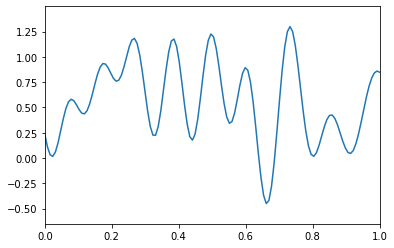

In [46]:
size = 128
x = np.linspace(0, 1, size) # x-values to plot
rand = lambda : np.random.randint(0,100) # random number function

smooth = 5 # smoothness
## 1 is very spiky, 5 is average, 20 is very smooth ##

V = 0 # initialize vector
r = np.random.randint(10,100) # set random number of curves
for n in range(0,r):
    V = V + (rand()/20)/r * np.cos( (rand()/smooth) * np.pi * x + rand())
    ## make sure amplitude, frequency and phase vary ##

V += 0.5 # make sure function is positive (because of OCD)

plt.axis([0, 1,min(V)-0.2,max(V)+0.2]) # set axes
plt.plot(x,V) # plot
V = np.insert(V, 0, [0, 0])

[0.02       0.04001278 0.06003703 0.08007401 0.10012379 0.12018637
 0.1402618  0.16035041 0.18045288 0.20057029 0.22070403 0.24085559
 0.2610264  0.28121757 0.30142986 0.32166364 0.34191909 0.36219641
 0.38249616 0.40281944 0.4231681  0.44354464 0.46395205 0.48439344
 0.50487165 0.52538893 0.54594672 0.56654564 0.58718575 0.60786701
 0.62858973 0.64935508 0.67016539 0.69102409 0.71193541 0.73290366
 0.75393243 0.77502369 0.79617712 0.81738984 0.83865662 0.85997064
 0.88132469 0.90271259 0.92413061 0.94557848 0.96705992 0.98858235
 1.01015585 1.03179159 1.05349987 1.07528821 1.09715993 1.11911343
 1.14114241 1.16323705 1.18538593 1.20757839 1.22980683 1.25206852
 1.27436653 1.29670966 1.31911111 1.34158641 1.36415081 1.38681659
 1.40959106 1.43247533 1.45546434 1.47854809 1.50171378 1.52494848
 1.54824181 1.57158807 1.59498729 1.6184451  1.64197125 1.6655772
 1.68927309 1.71306484 1.73695179 1.76092563 1.78497067 1.80906566
 1.83318672 1.85731122 1.88142152 1.90550837 1.92957306 1.95362

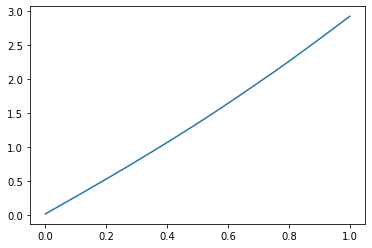

In [55]:
E = 5 #float(input("E = "))
x_step = 1 / size
initcond2 = 0.02
initcond1 = 0
def psi_plus(V, x_step, psi):
    psi_plus = ((2 - x_step ** 2 * 2 * (V[i-1] - E)) * psi[i-1] - (1 - x_step ** 2 * 2 * (V[i-2] - E)) * psi[i-2]) / (1 - x_step ** 2 * 2 * (V[i] - E))
    return psi_plus
#print(V)
psi = np.array([initcond1, initcond2])
i = 2
while (i < size + 1):
    psi_plus = ((2 - x_step ** 2 * 2 * (V[i-1] - E)) * psi[i-1] - (1 - x_step ** 2 * 2 * (V[i-2] - E)) * psi[i-2]) / (1 - x_step ** 2 * V[i])
    psi = np.append(psi, psi_plus)
    i = i + 1
psi = psi[1:]
print(psi)
plt.plot(x, psi)